In [ ]:
import pandas as pd
import numpy as np

Import Trips Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving trips.csv to trips (1).csv


To Dataframe

In [ ]:
df=pd.read_csv("trips.csv")
#Replace patterns to obtain only the coordinates
df=df.replace("POINT ", "", regex=True)
df=df.replace('', '_', regex=True)

df['origin_coord']=df['origin_coord'].str.replace(r"(","")
df['origin_coord']=df['origin_coord'].str.replace(r")","")
df['destination_coord']=df['destination_coord'].str.replace(r"(","")
df['destination_coord']=df['destination_coord'].str.replace(r")","")

<ipython-input-297-2142b79be824>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['origin_coord']=df['origin_coord'].str.replace(r"(","")
<ipython-input-297-2142b79be824>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['origin_coord']=df['origin_coord'].str.replace(r")","")
<ipython-input-297-2142b79be824>:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['destination_coord']=df['destination_coord'].str.replace(r"(","")
<ipython-input-297-2142b79be824>:9: FutureWarning: The default value of regex will change fro

Let's store the x and y coordinates in different columns, named as each component.

In [ ]:
origins=pd.DataFrame(columns=['x','y'])
dest=pd.DataFrame(columns=['x','y'])
df_origins = df.origin_coord.str.split(' ', expand=True)
df_dest = df.destination_coord.str.split(' ', expand=True)

origins["x"]=df_origins.iloc[:,0]
origins["y"]=df_origins.iloc[:,1]
dest["x"]=df_dest.iloc[:,0]
dest["y"]=df_dest.iloc[:,1]
#df_origins=pd.to_numeric(df_origins)
#df_dest=pd.to_numeric(df_dest)
origins["x"]=pd.to_numeric(origins["x"])
origins["y"]=pd.to_numeric(origins["y"])
dest["x"]=pd.to_numeric(dest["x"])
dest["y"]=pd.to_numeric(dest["y"])

df['Euclidian_Distance']=np.sqrt((origins.x-dest.x)**2+(origins.y-dest.y)**2)
#Procesos automatizados para ingerir y almacenar datos bajo demanda 
#a) Agrupación de Viajes Similares en términos de origen, destina y hora del día.


    

Scatter plot for Localization of Origins


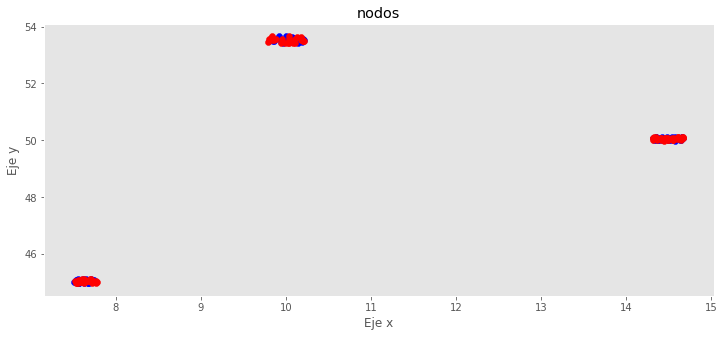

In [ ]:
import matplotlib.pyplot as plt
X=list(origins.x)
Y=list(origins.y)
X2=list(dest.x)
Y2=list(dest.y)
#Graficar la solución
plt.figure(figsize=(12,5))
ax=plt.scatter(X,Y,color='b',label='Origins')
bx=plt.scatter(X2,Y2,color='r',label='destinations')

plt.xlabel("Eje x")
plt.ylabel("Eje y")
plt.title("nodos")
plt.grid()
plt.show()

Lets Visualize the First group:

This is just simply to see more closely the "group"

At least, in terms of Coordinates, the data is very similar but we have to see the latent or hidden relationes that could lead to different groups.


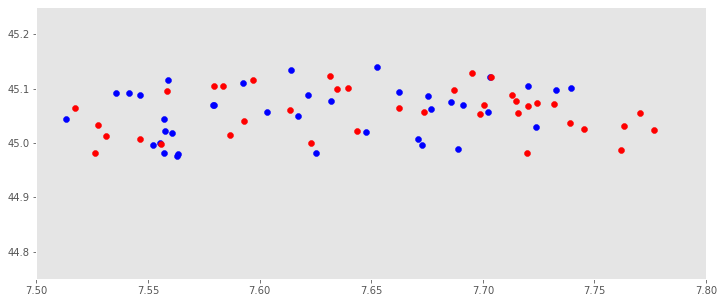

In [ ]:
X=list(origins.x)
Y=list(origins.y)
X2=list(dest.x)
Y2=list(dest.y)
#Graficar la solución
plt.figure(figsize=(12,5))

ax=plt.scatter(X,Y,color='b',label='Origins')
bx=plt.scatter(X2,Y2,color='r',label='destinations')
plt.xlim(7.5,7.8)
plt.ylim(44.75,45.25);
plt.grid()
plt.show()

Second group

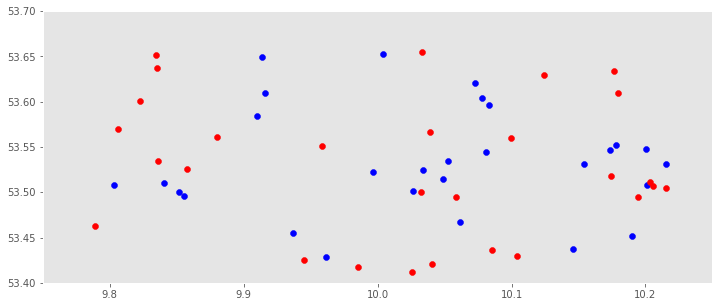

In [ ]:
X=list(origins.x)
Y=list(origins.y)
X2=list(dest.x)
Y2=list(dest.y)
#Graficar la solución
plt.figure(figsize=(12,5))

ax=plt.scatter(X,Y,color='b',label='Origins')
bx=plt.scatter(X2,Y2,color='r',label='destinations')
plt.xlim(9.75, 10.25)
plt.ylim(53.4,53.7);
plt.grid()
plt.show()

Same plot for Destinations

Third Cluster

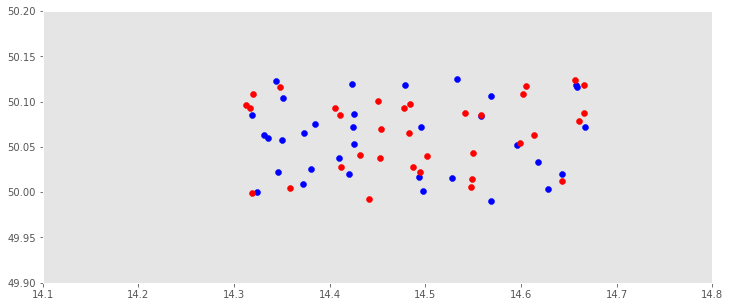

In [ ]:
X=list(origins.x)
Y=list(origins.y)
X2=list(dest.x)
Y2=list(dest.y)
#Graficar la solución
plt.figure(figsize=(12,5))

ax=plt.scatter(X,Y,color='b',label='Origins')
bx=plt.scatter(X2,Y2,color='r',label='destinations')
plt.xlim(14.1, 14.8)
plt.ylim(49.9,50.2);
plt.grid()
plt.show()

# K-Means Clustering Algorithm

Let's propose this widely used algorithm to group the data by origin-destination coordinates tuples and the Date-Time index. 



In [ ]:
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize']=(16,9)
plt.style.use('ggplot')



Just to Check that everything went well, let's get the Dataframe header

In [ ]:
df.head()

,region,origin_coord,destination_coord,datetime,datasource,Euclidian_Distance
0,Prague,14.4973794438195 50.00136875782316,14.43109483523328 50.04052930943246,2018-05-28 09:03:40,funny_car,0.076988
1,Turin,7.672837913286881 44.9957109242058,7.720368637535126 45.06782385393849,2018-05-21 02:54:04,baba_car,0.086368
2,Prague,14.32427345662177 50.00002074358429,14.47767895969969 50.09339790740321,2018-05-13 08:52:25,cheap_mobile,0.179590
3,Turin,7.541509189114433 45.09160503827746,7.74528653441973 45.02628598341506,2018-05-06 09:49:16,bad_diesel_vehicles,0.213990
4,Turin,7.614078119815749 45.13433106465422,7.527497142312585 45.03335051325654,2018-05-23 12:45:54,pt_search_app,0.133016


OK, let's extend the dataframe to get the x,y coordinates for every origin-destination and drop the origin_coord and destination_coord columns.


In [ ]:
df["origin_x"]=origins.x
df["origin_y"]=origins.y
df["destination_x"]=dest.x
df["destination_y"]=dest.y
df=df.drop(['origin_coord','destination_coord'],axis=1)
df.head()

,region,datetime,datasource,Euclidian_Distance,origin_x,origin_y,destination_x,destination_y
0,Prague,2018-05-28 09:03:40,funny_car,0.076988,14.497379,50.001369,14.431095,50.040529
1,Turin,2018-05-21 02:54:04,baba_car,0.086368,7.672838,44.995711,7.720369,45.067824
2,Prague,2018-05-13 08:52:25,cheap_mobile,0.179590,14.324273,50.000021,14.477679,50.093398
3,Turin,2018-05-06 09:49:16,bad_diesel_vehicles,0.213990,7.541509,45.091605,7.745287,45.026286
4,Turin,2018-05-23 12:45:54,pt_search_app,0.133016,7.614078,45.134331,7.527497,45.033351


#Stadistics

In [ ]:
df.describe()

,Euclidian_Distance,origin_x,origin_y,destination_x,destination_y
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.133169,10.625815,49.130882,10.642621,49.131690
std,0.079870,2.939491,3.486063,2.939784,3.485112
min,0.012414,7.513135,44.976125,7.517130,44.981717
25%,0.068412,7.668960,45.087243,7.710828,45.073145
50%,0.124289,10.029960,50.035628,10.029044,50.042092
75%,0.182373,14.372000,53.452932,14.416400,53.421421
max,0.343638,14.666893,53.652201,14.665600,53.654196


# First Insight: Distributions

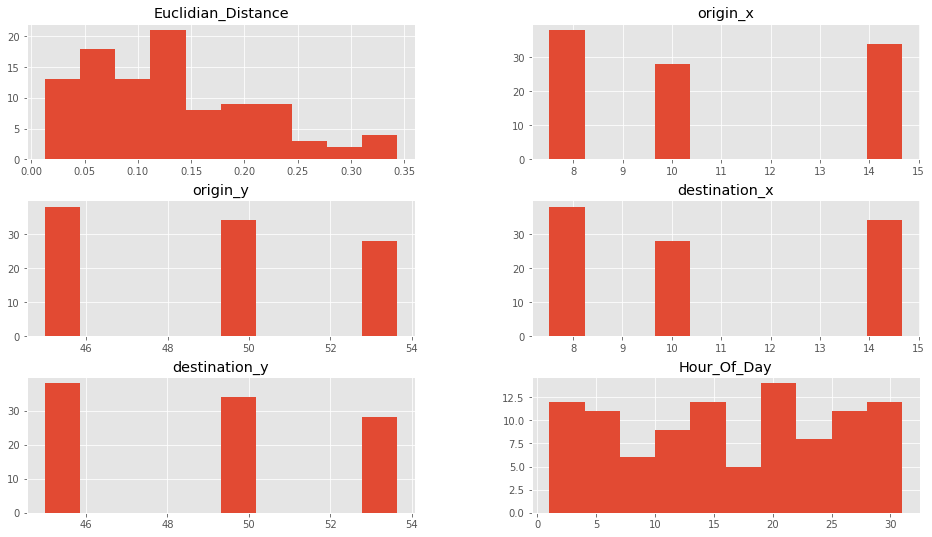

In [ ]:
df['Hour_Of_Day']=pd.to_datetime(df['datetime'])
df['Hour_Of_Day']=df['Hour_Of_Day'].dt.day
df.hist()
plt.show()

# Let's count the different regions where the trips are distributed

In [ ]:
#df['Datetime'] = pd.to_datetime(df['datetime'],format="%Y/%m/%d, %H:%M:%S")
#df=df.drop(['Datetime','datetime'],axis=1)
print(df.groupby('region').size())

region
Hamburg    28
Prague     34
Turin      38
dtype: int64


As we see, this is the explanation of the first plots showing the similarities of the trips.

Now, we seek for correlations between the variables

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


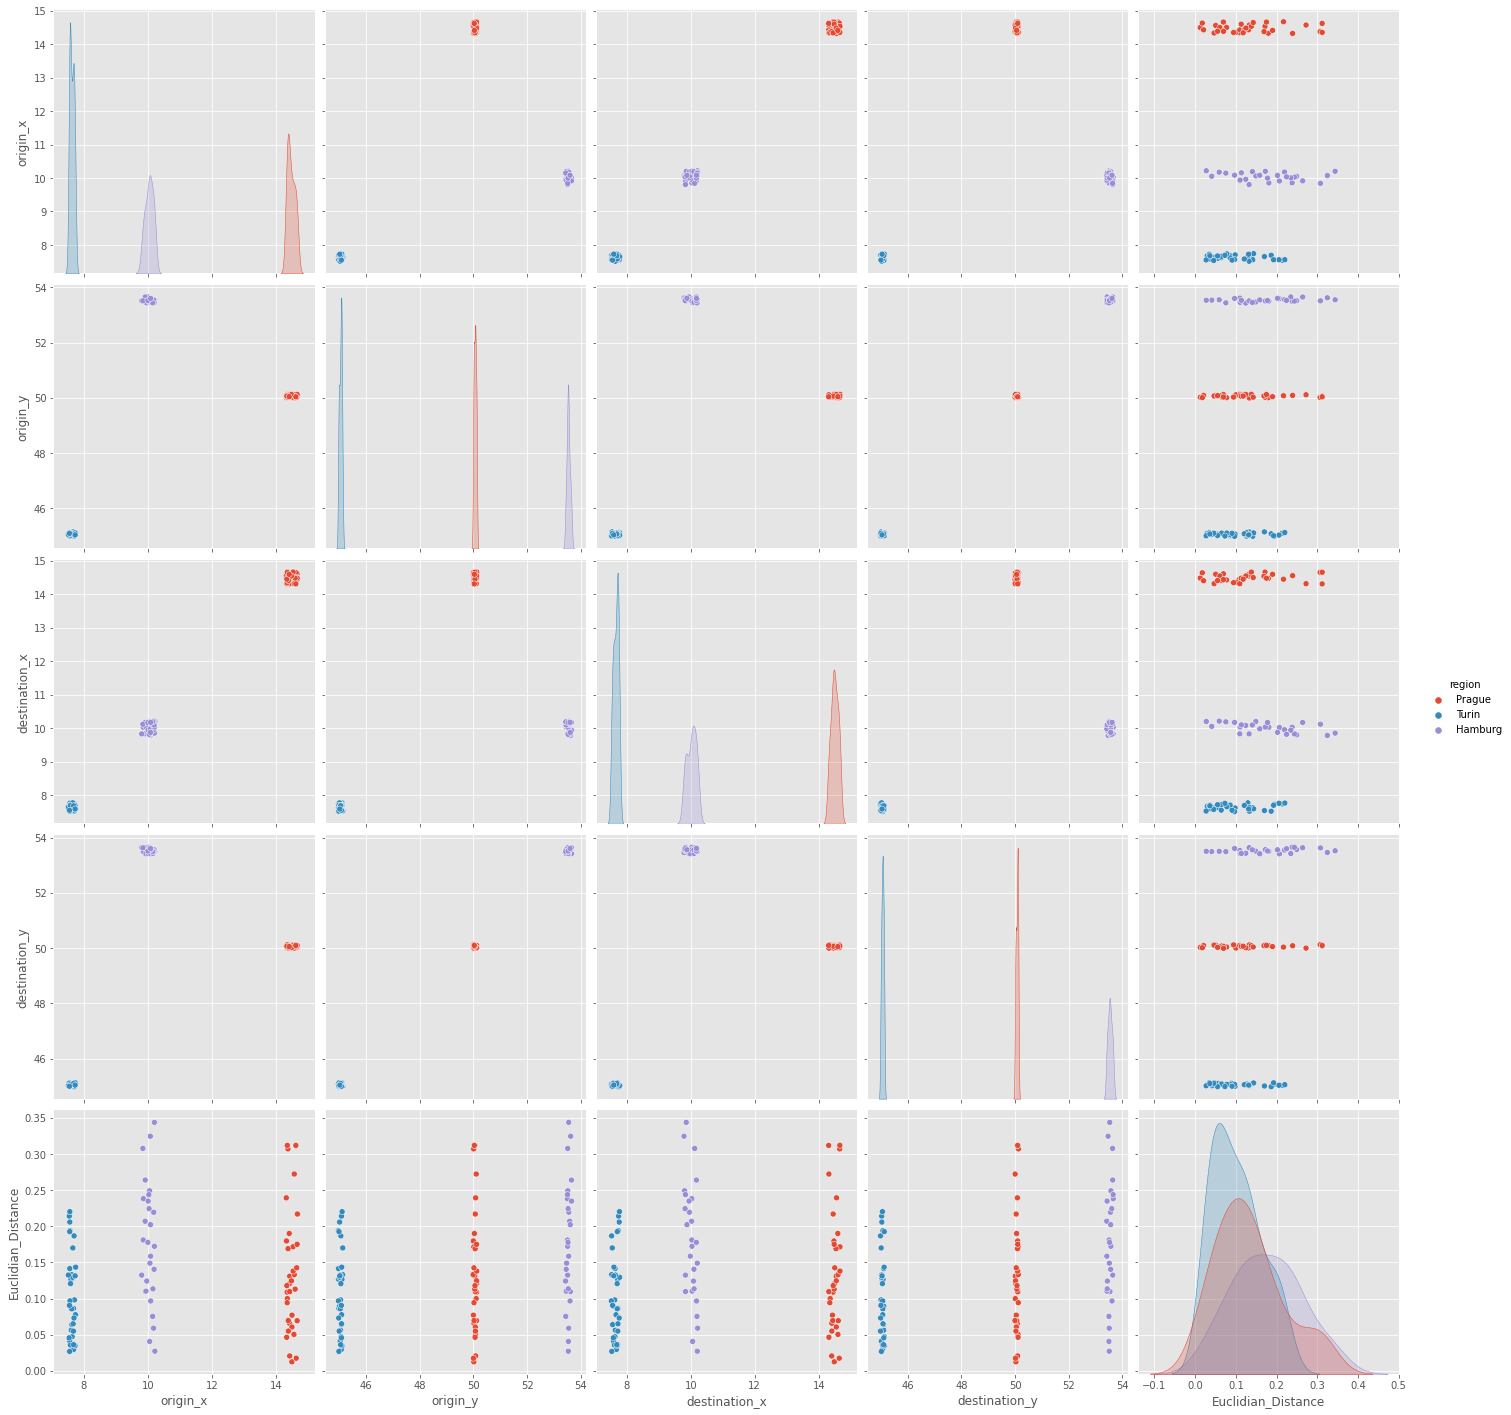

In [ ]:
sb.pairplot(df.dropna(),hue= 'region',size=4,vars=["origin_x","origin_y","destination_x","destination_y","Euclidian_Distance"],kind='scatter')

We can now see in the histograms and scatter plots.

We also can see that the Euclidian distances for each Region is distributed nearly as a Normal distribution. Further hypothesis testing is needed for the data to affirm that.

As we have calculated the Euclidian Distance for every trip, we are going to use in X along with the coordinates and hour of the day  , and we use Y for the region classification of every trip. 

In [ ]:
X = np.array(df[["origin_x","origin_y","destination_x","destination_y","Hour_Of_Day","Euclidian_Distance"]])
#Agregar Datetime
y = np.array(df['region'])
X.shape

(100, 6)

# Finding the Optimal K Value 

We have to look for the Elbow of the curve, or at least the value where the derivate gets closer to 0.

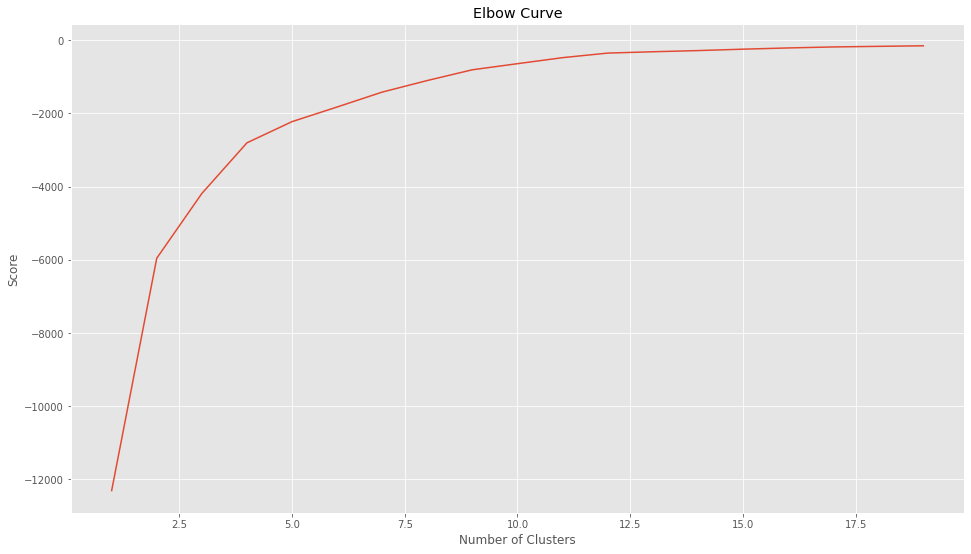

In [ ]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Wew se that 5 it's the most proximate value to the "elbow" of the curve


# **Let's Execute K-Means**
# How K-Means Work
The algorithm works iteratively to assign each "point" (the rows of our input set form a coordinate) one of the "K" groups based on its characteristics. They are grouped based on the similarity of their features (the columns). As a result of executing the algorithm we will have:


a) The "centroids" of each group that will be "coordinates" of each of the K sets that will be used to label new samples.

b)Labels for the training data set. Each label belonging to one of the K groups formed.

The groups are defined in an "organic" way, that is, their position is adjusted in each iteration of the process, until the algorithm converges. Once the centroids have been found, we must analyze them to see what their unique characteristics are, compared to that of the other groups. These groups are the labels that the algorithm generates.

The main focus is to, make cluster by K-means to te actual data, and then train a classification ML model to categorice trips by coordinates and hour of day.

In [ ]:
from datetime import datetime
#print(type(df.datetime))

In [ ]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[12.55416109 51.54449196 12.55791616 51.5566522  15.23809524  0.16999502]
 [ 7.64474654 45.05932103  7.65624958 45.06132162 24.8         0.09330776]
 [ 7.59880322 45.05272241  7.65452591 45.05088792  8.72222222  0.11143443]
 [11.80718673 52.15356191 11.83866794 52.13770361 25.55        0.15067935]
 [13.00604751 51.21177135 12.99361943 51.21822877  5.          0.13625747]]


/usr/local/lib/python3.8/dist-packages/mpl_toolkits/mplot3d/art3d.py:794: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
/usr/local/lib/python3.8/dist-packages/mpl_toolkits/mplot3d/art3d.py:796: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


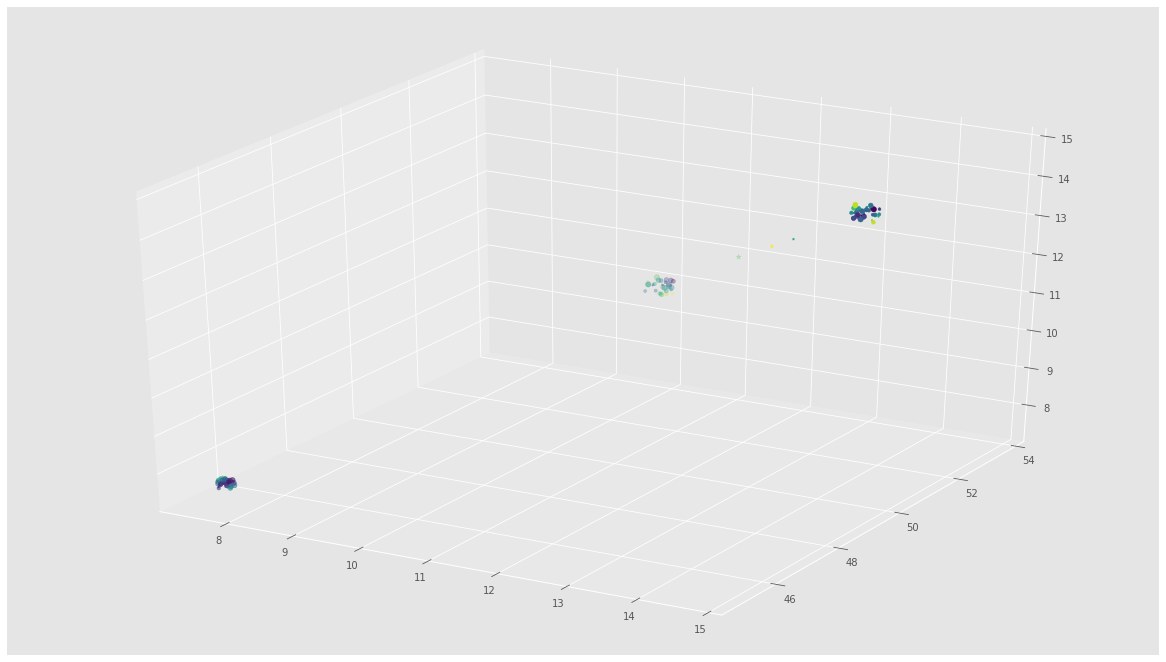

In [ ]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2],  X[:, 3], X[:, 4],  X[:, 5])
ax.scatter(C[:, 0], C[:, 1], C[:, 2],  C[:, 3], C[:, 4], C[:, 5], marker='*')

# 2-D Projections of previous Plot

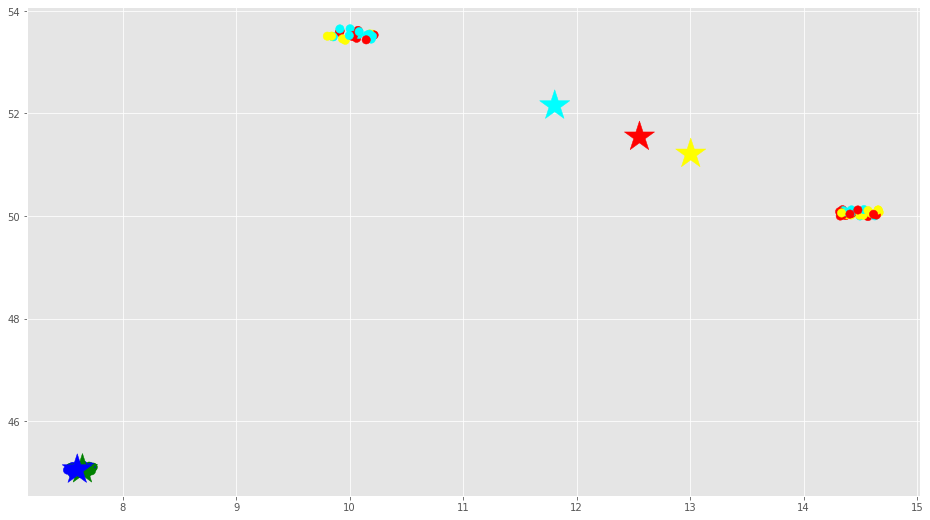

In [ ]:
# Getting the values and plotting it
f1 = df['origin_x'].values
f2 = df['origin_y'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

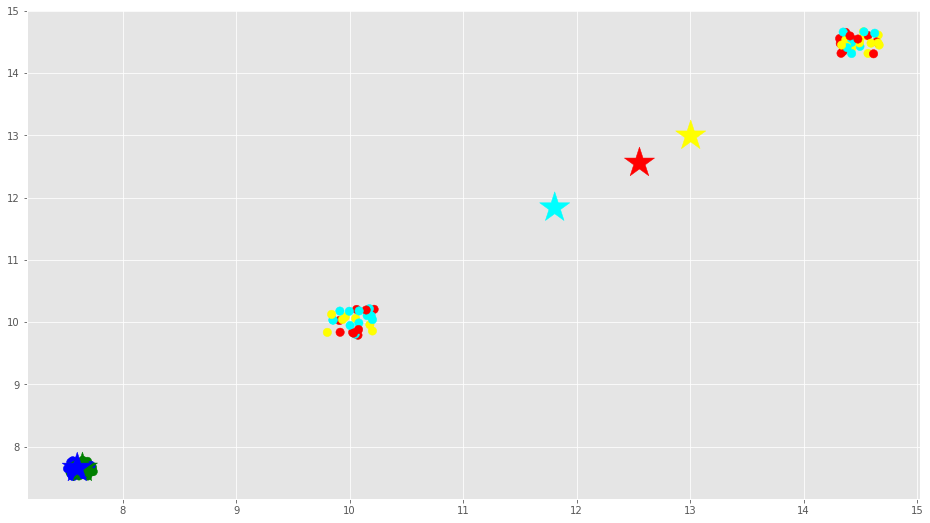

In [ ]:
# Getting the values and plotting it
f1 = df['origin_x'].values
f2 = df['destination_x'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

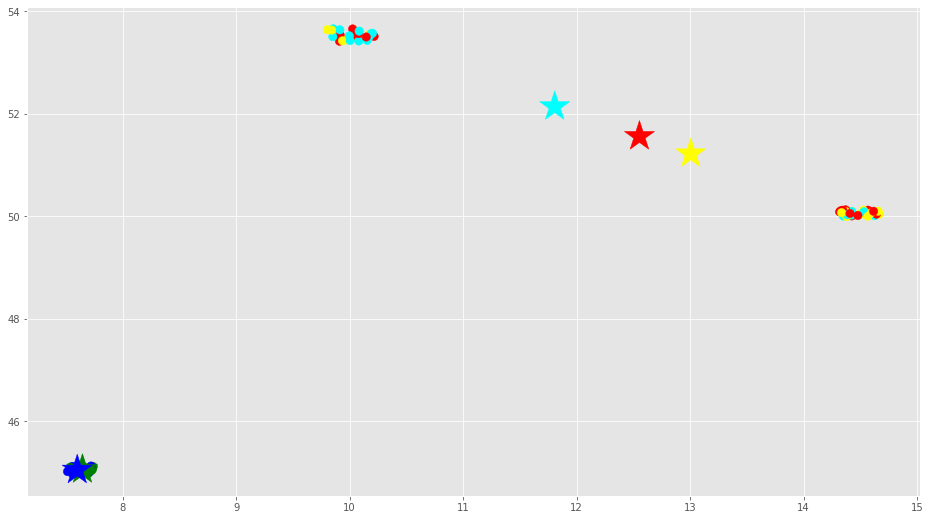

In [ ]:
# Getting the values and plotting it
f1 = df['origin_x'].values
f2 = df['destination_y'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 3], marker='*', c=colores, s=1000)
plt.show()

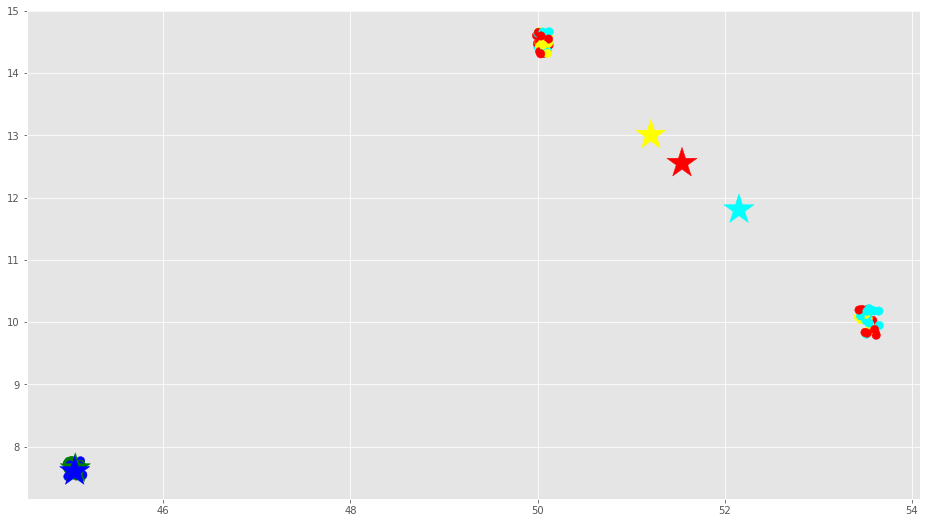

In [ ]:
# Getting the values and plotting it
f1 = df['origin_y'].values
f2 = df['destination_x'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 0], marker='*', c=colores, s=1000)
plt.show()

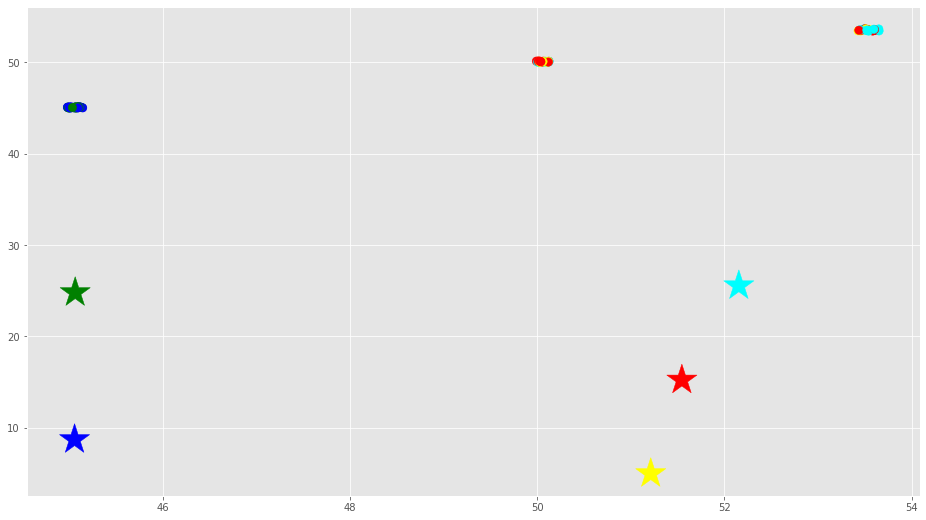

In [ ]:
# Getting the values and plotting it
f1 = df['origin_y'].values
f2 = df['destination_y'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 4], marker='*', c=colores, s=1000)
plt.show()

# Labels Count


In [ ]:
copy =  pd.DataFrame()
#copy['usuario']=dataframe['usuario'].values deberia datetime aca como RUT
copy['Euclidian_Distance']=df['Euclidian_Distance'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,21
1,green,20
2,blue,18
3,cyan,20
4,yellow,21


Let's Get the number of the week relative to year to obtain weekly means

In [ ]:
df['Week_Of_Year']=pd.to_datetime(df['datetime'])
df['Week_Of_Year']=df['Week_Of_Year'].dt.isocalendar().week
df.head
copy['Week_Of_Year']=df['Week_Of_Year']
copy.head()


,Euclidian_Distance,label,Week_Of_Year
0,0.076988,3,22
1,0.086368,1,21
2,0.179590,0,19
3,0.213990,2,18
4,0.133016,1,21


In [ ]:
#Now, let's define the dimensions of the bounding box
#x Coordinate of the center
x=4
#y Coordinate of the center
y=20
#width of the bounding box
w=50
#height of the bounding box
h=50
#Now let's set the bounding box bounds
left_bound=x-(w/2)
right_bound=x+(w/2)
upper_bound=y+(h/2)
lower_bound=y-(h/2)
#Now let's filter de dataframe by the bounds of the bounding box
df = df[df['origin_x'] <= right_bound ]
df = df[df['origin_x'] >= left_bound ]
df = df[df['origin_y'] <= upper_bound ]
df = df[df['origin_y'] >= lower_bound ]
print(lower_bound,upper_bound,left_bound,right_bound)
print(df)


-5.0 45.0 -21.0 29.0
   region             datetime           datasource  Euclidian_Distance  \
1   Turin  2018-05-21 02:54:04             baba_car            0.086368   
14  Turin  2018-05-25 15:16:35        pt_search_app            0.141371   
20  Turin  2018-05-16 11:56:33        pt_search_app            0.193820   
37  Turin  2018-05-26 12:14:42  bad_diesel_vehicles            0.126706   
56  Turin  2018-05-13 22:16:27        pt_search_app            0.096678   
63  Turin  2018-05-27 09:49:16         cheap_mobile            0.073031   
72  Turin  2018-05-11 05:58:34         cheap_mobile            0.192480   
76  Turin  2018-05-02 00:22:18        pt_search_app            0.026796   

    origin_x   origin_y  destination_x  destination_y  Hour_Of_Day  \
1   7.672838  44.995711       7.720369      45.067824           21   
14  7.557295  44.980984       7.634489      45.099420           25   
20  7.563046  44.976125       7.731931      45.071226           16   
37  7.625041  44.981823

OK, so until now we can define a Bound Box with a center, width and height and it's correctly ciltering and reducing the data frame.

Now we proceed to calculate the weekly average of trips for that bounding box.


In [ ]:
WK=df.groupby(['Week_Of_Year']).datetime.count()
#We count by datetime stamp since is like an ID

WK.head()


Week_Of_Year
18    1
19    2
20    1
21    4
Name: datetime, dtype: int64

In [ ]:
#We now can see the amount of trips by number of week of the year
#Now we obtain the average for the dataframe 
Weekly_Trips_Avg=WK.mean()
print("The average weekly amount of trips for the bounding box is: ",Weekly_Trips_Avg, "trips")

The average weekly amount of trips for the bounding box is:  2.0 trips


# Weekly Average of Trips by Region

In [ ]:
WK=df.groupby(['region']).datetime.count()  
Weekly_Trips_Avg_by_region=WK.mean()
print(WK)

region
Turin    8
Name: datetime, dtype: int64


The previous result y currently affected by the filtering and previous processing, showing only 1 region: Turin.

This will not happen in the encapsulated version of the program as the complete querie is done in a python function.